In [ ]:
import sys, os
import importlib
os.path.dirname(sys.executable)
sys.path.append('/c4/home/sermare/fusioncharacterization_gliomas/')

from fcg.common_imports import *
from fcg import data_utils
from fcg import plots
from fcg import paths

pd.set_option('display.max_columns', None)

In [2]:
metadata = pd.read_csv('/c4/home/sermare/tables_fusion_characterization/60_patients_metadata.csv').drop_duplicates('file_path_x')
arriba38 = pd.read_csv('/c4/home/sermare/tables_fusion_characterization/60_patients_arriba_output.csv')
star38 = pd.read_csv('/c4/home/sermare/tables_fusion_characterization/60_patients_star_output.csv')

In [7]:
arriba38 = arriba38[arriba38['SF#'].isin(metadata['SF#'])]
star38 = star38[star38['SF#'].isin(metadata['SF#'])]

final_df = data_utils.get_final_df(arriba38, star38, metadata)
final_df['fusion_genes'] = final_df['fg_bk'].str.split('_', expand = True)[0]

In [93]:
gtex_fusions = pd.read_csv(paths.GTEX_FUSIONS_OLD, ',' , header = 0)
gtex_fusions['fusion_gene'] = gtex_fusions['fusion_name'].str.replace('::','/')

gtex_fusions['RightBreakpoint'] = gtex_fusions['RightBreakpoint'].str.replace(':-','', regex = False).str.replace(':+','', regex = False)
gtex_fusions['fg_bk'] = gtex_fusions['fusion_gene'] + '_' + gtex_fusions['LeftBreakpoint'] + '_' + gtex_fusions['RightBreakpoint']


/scratch/sermare/ipykernel_2898797/3550335150.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  gtex_fusions = pd.read_csv(paths.GTEX_FUSIONS_OLD, ',' , header = 0)


In [9]:
chromosome_sizes = pd.read_csv(paths.CYTOBAND_FILE, '\t', header = None, names = ['chrom', 'start', 'end','annot', 'gieStain'])
chromosome_sizes = chromosome_sizes[chromosome_sizes['annot'].notna()]

/scratch/sermare/ipykernel_2898797/3089260568.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  chromosome_sizes = pd.read_csv(paths.CYTOBAND_FILE, '\t', header = None, names = ['chrom', 'start', 'end','annot', 'gieStain'])


In [8]:
final_df['GTEX'] = final_df['fusion_genes'].isin(gtex_fusions['fusion_gene'])

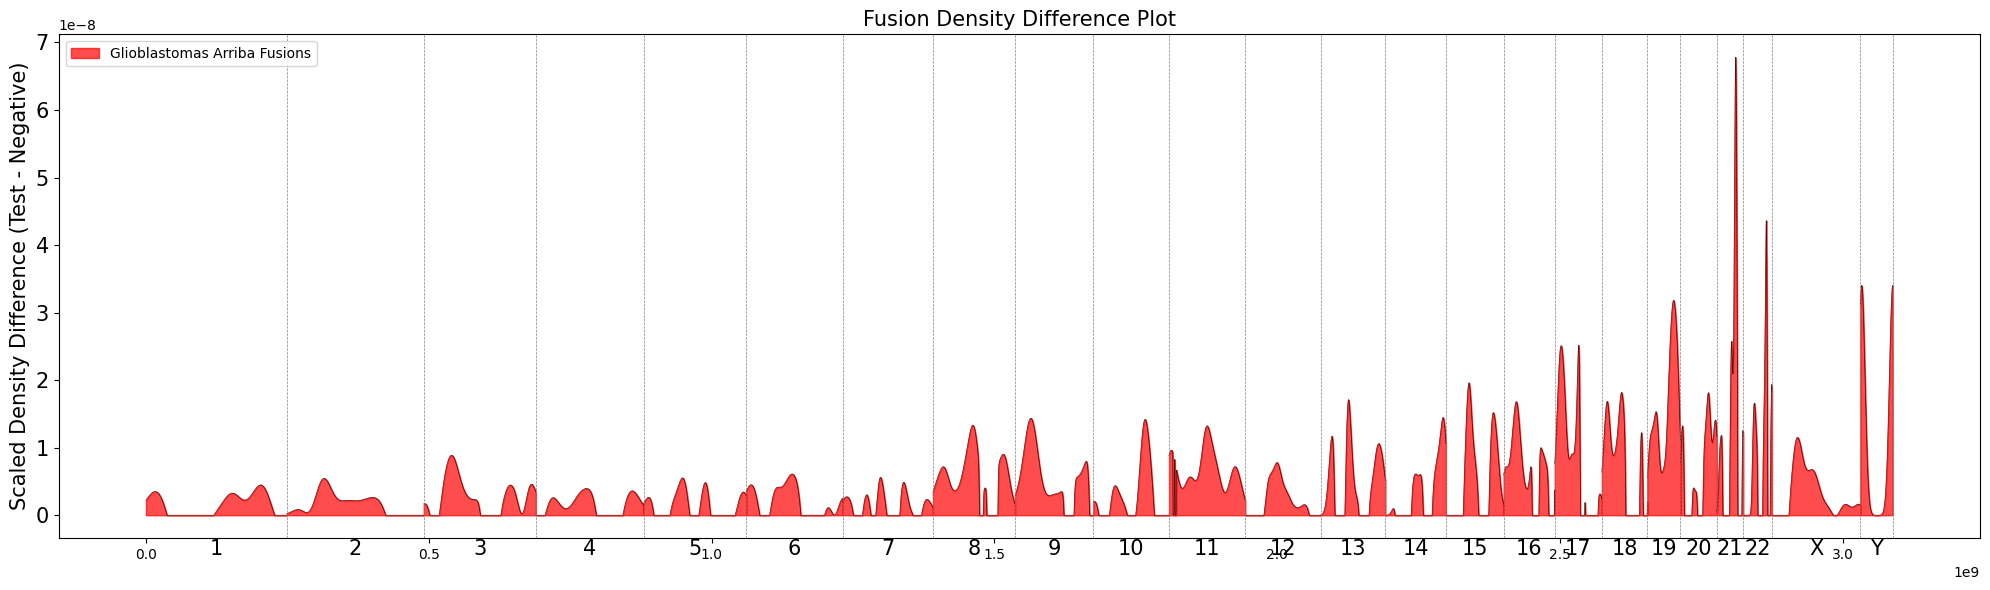

In [83]:
importlib.reload(plots)

neg_entries = final_df[
    (final_df['GTEX'] == True) &
    (final_df['Histology'] == 'GBM') &
    (final_df['arriba_hg38'] > 0 ) 
]

pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'GBM') &
    (final_df['arriba_hg38'] > 0 ) 
]

plots.plot_fusion_densities(pos_entries, neg_entries, chromosome_sizes, label = 'Glioblastomas Arriba Fusions')

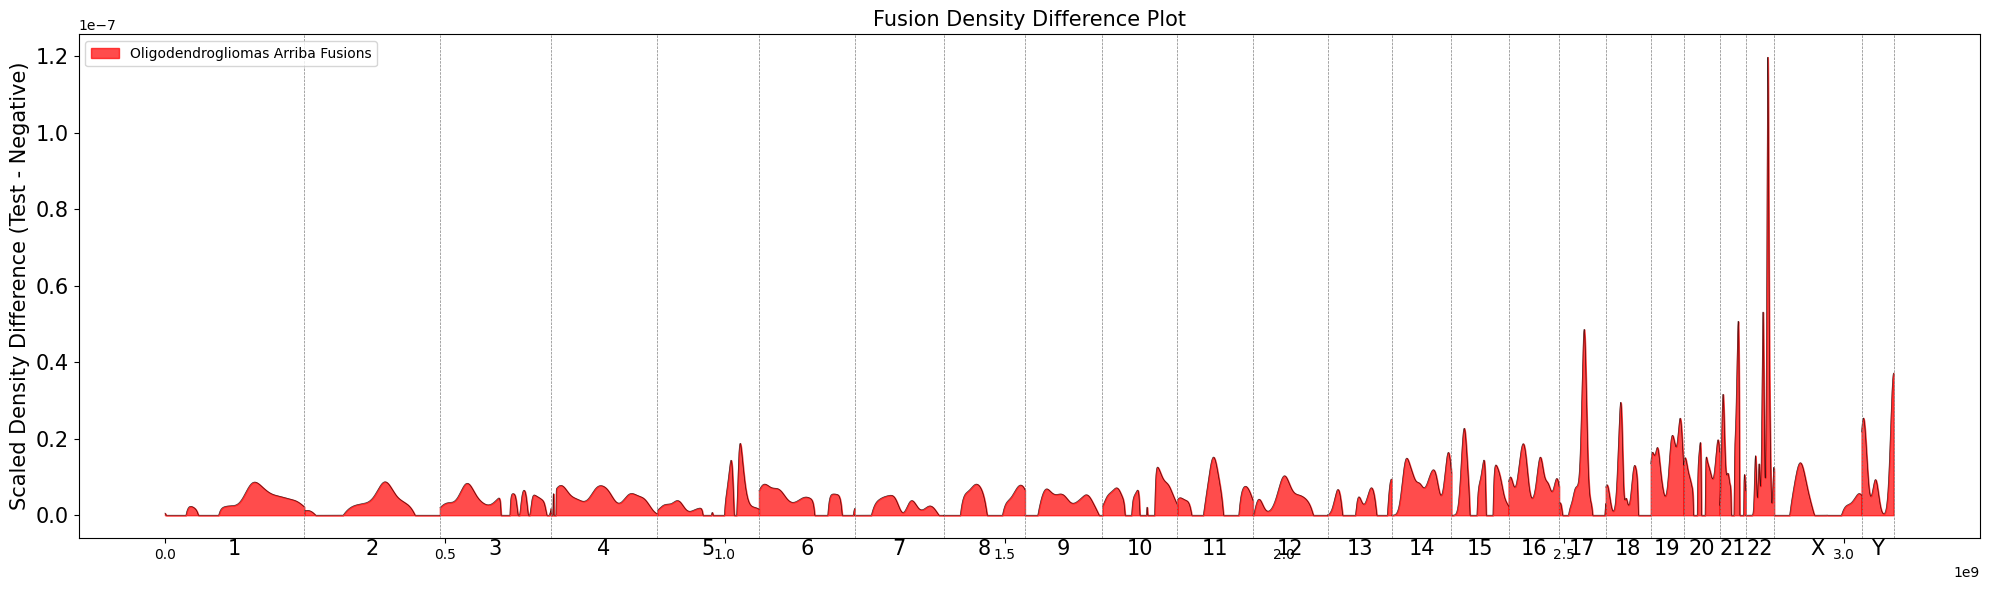

In [116]:
importlib.reload(plots)

neg_entries = final_df[
    (final_df['GTEX'] == True) &
    (final_df['Histology'] == 'Oligo') &
    (final_df['arriba_hg38'] > 0 ) 
]

pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'Oligo') &
    (final_df['arriba_hg38'] > 0 ) 
]

plots.plot_fusion_densities(pos_entries, neg_entries, chromosome_sizes, label = 'Oligodendrogliomas Arriba Fusions')

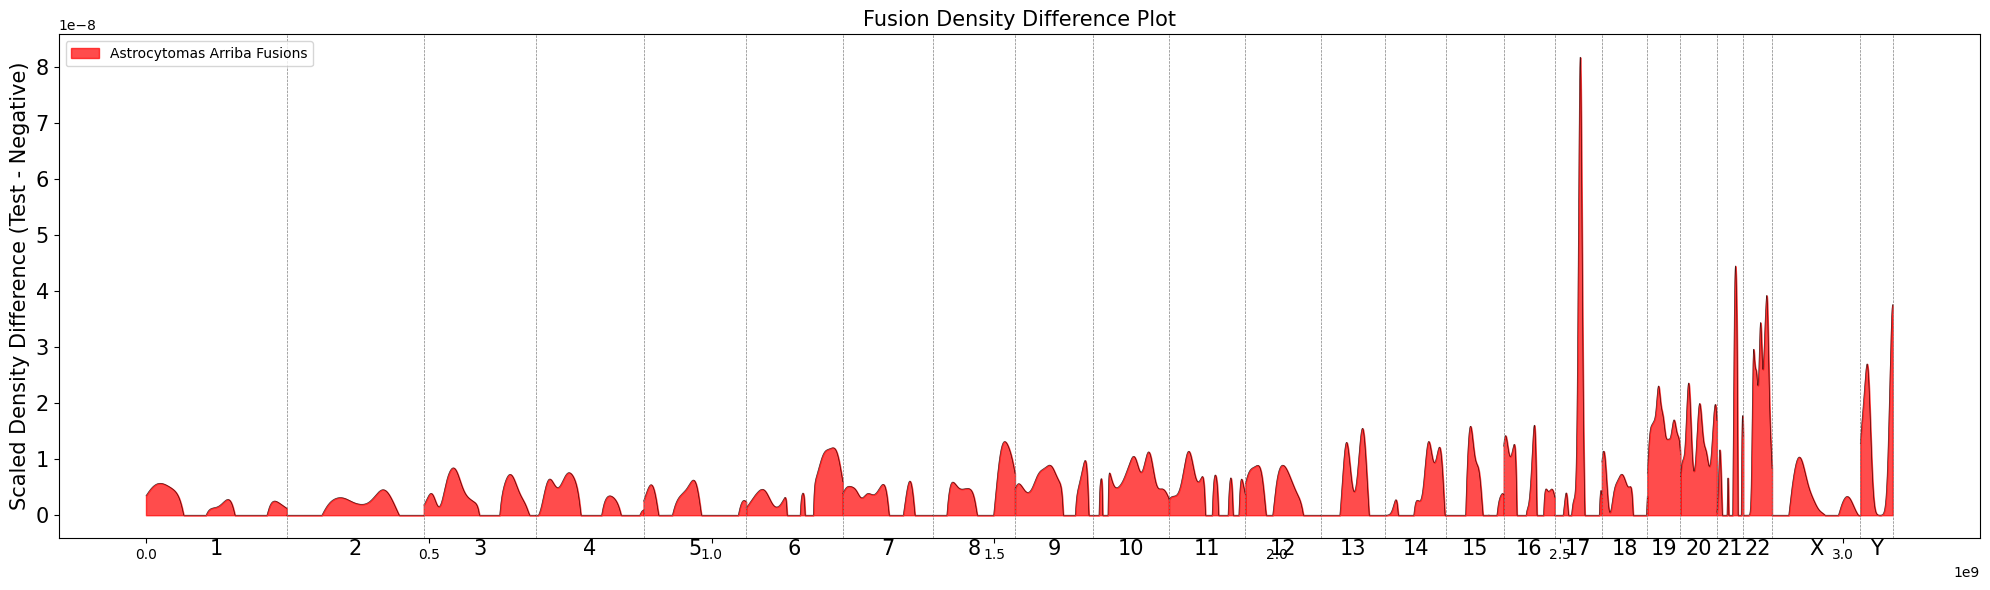

In [ ]:
neg_entries = final_df[
    (final_df['GTEX'] == True) &
    (final_df['Histology'] == 'Astro') &
    (final_df['arriba_hg38'] > 0 ) 
]

pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'Astro') &
    (final_df['arriba_hg38'] > 0 ) 
]

plots.plot_fusion_densities(pos_entries, neg_entries, chromosome_sizes, label = 'Astrocytomas Arriba Fusions')

In [159]:
# Incorporation of work with STAR-fusion

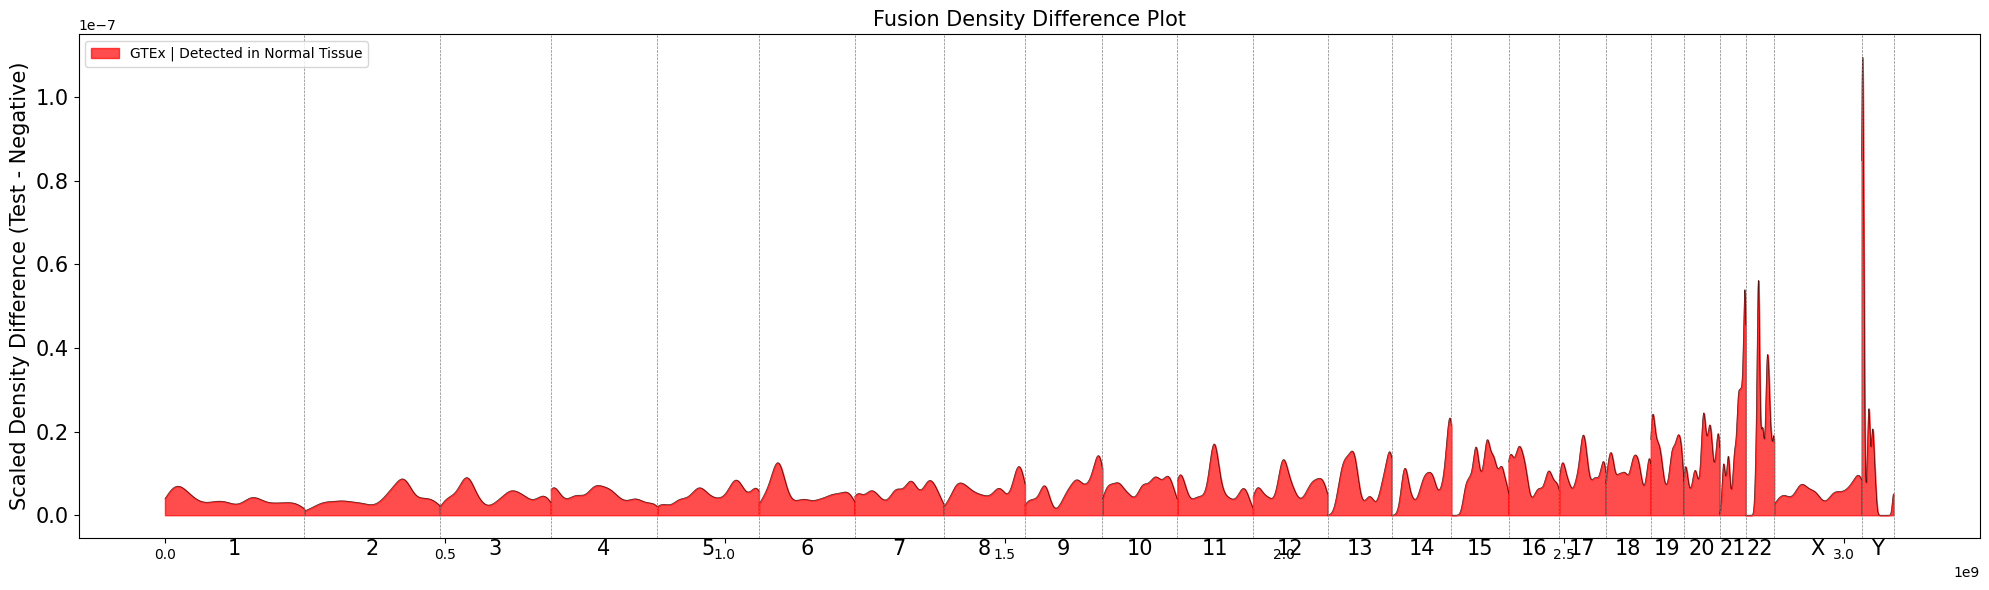

In [160]:
plots.plot_fusion_densities(gtex_fusions[['fg_bk']].astype('str'),
                            gtex_fusions[['fg_bk']].astype('str').head(1),
                            chromosome_sizes,
                            label = 'GTEx | Detected in Normal Tissue')

In [119]:
tcga_fusions_star = pd.read_csv(paths.GTEX_FUSIONS_NEW, ',' , header = 0)
tcga_fusions_star = tcga_fusions_star[tcga_fusions_star['data_class'] == 'TCGA']
tcga_fusions_star['fusion_gene'] = tcga_fusions_star['fusion_name'].str.replace('::','/')

tcga_fusions_star['RightBreakpoint'] = tcga_fusions_star['RightBreakpoint'].str.replace(':-','', regex = False).str.replace(':+','', regex = False)
tcga_fusions_star['fg_bk'] = tcga_fusions_star['fusion_gene'] + '_' + tcga_fusions_star['LeftBreakpoint'] + '_' + tcga_fusions_star['RightBreakpoint']


/scratch/sermare/ipykernel_2898797/1025544632.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  tcga_fusions_star = pd.read_csv(paths.GTEX_FUSIONS_NEW, ',' , header = 0)


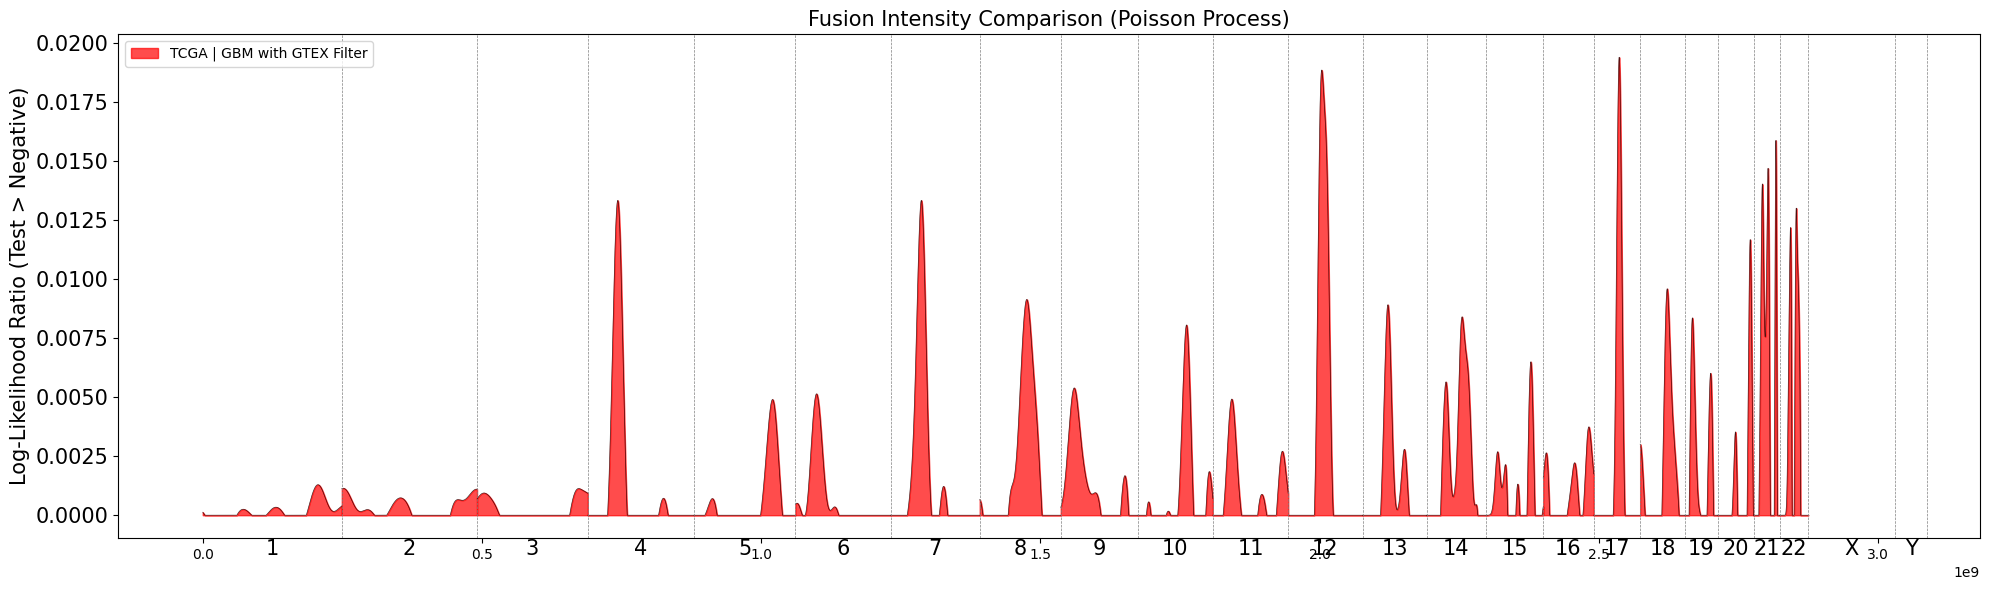

In [144]:
importlib.reload(plots)
plots.plot_fusion_densities_llr(tcga_fusions_star[tcga_fusions_star['tissue_type'] == 'GBM'][['fg_bk']].astype('str'),
                            gtex_fusions[['fg_bk']].astype('str'),
                            chromosome_sizes,
                            label = 'TCGA | GBM with GTEX Filter')

Get length of chromosome: Extract the chromosome lengths from chromosome_sizes.

Bin chromosome by 1000: Create bins with a size of 1000 bp (0.001 Mbp) for fine resolution.

Locate all the fusions in that bin: Use a histogram to count fusion events within each bin.

Divide by length of chromosome: Normalize the counts by the chromosome length to get a density (events per bp), though since the bin size is fixed at 1000 bp, we’ll adjust the normalization to reflect this context.

Plot: Generate a plot showing the normalized density across the genome.



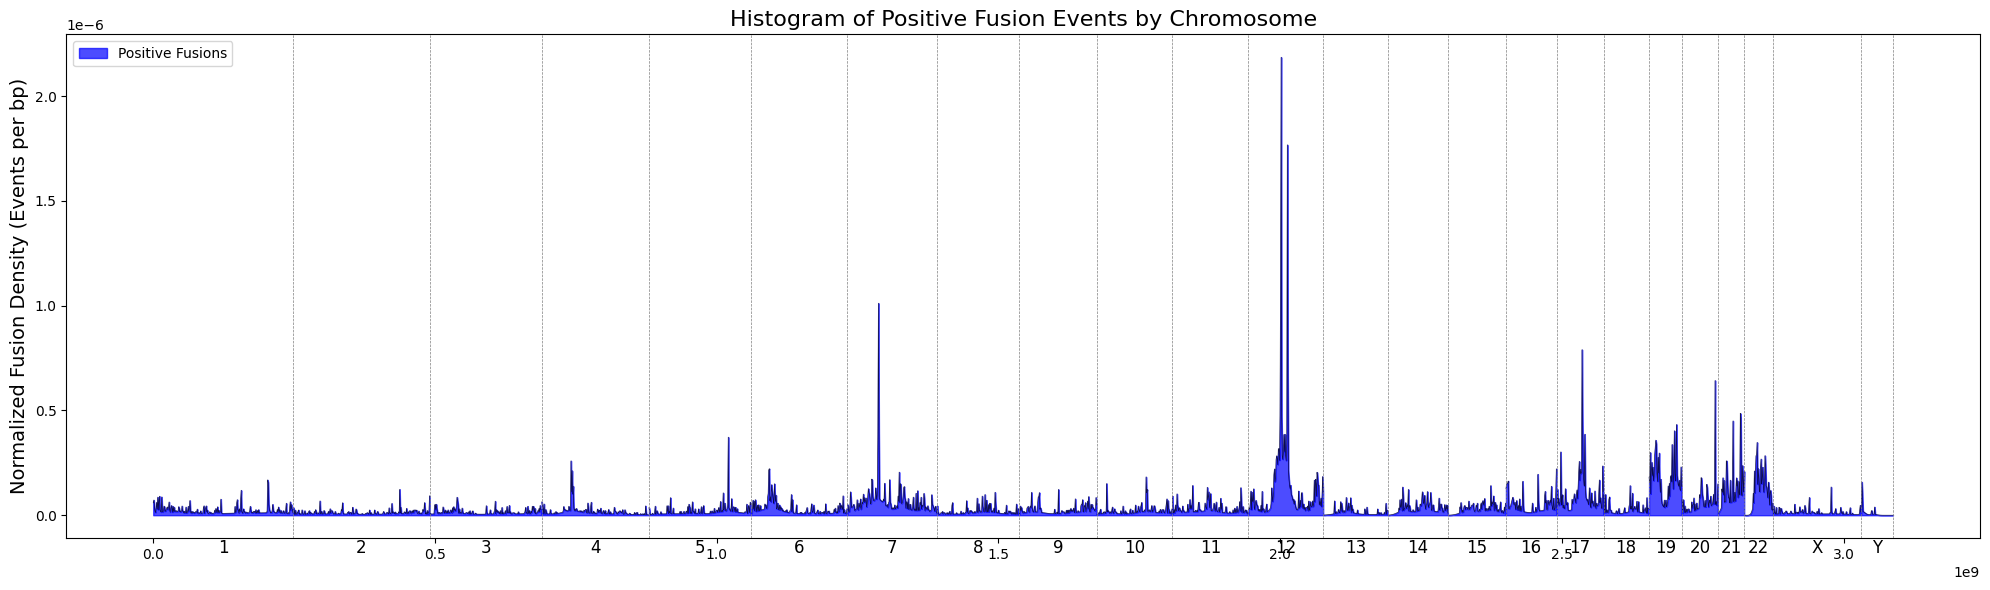

In [177]:
importlib.reload(plots)

plots.plot_positive_fusion_histogram(tcga_fusions_star[tcga_fusions_star['tissue_type'] == 'GBM'][['fg_bk']].astype('str'),
                            chromosome_sizes)

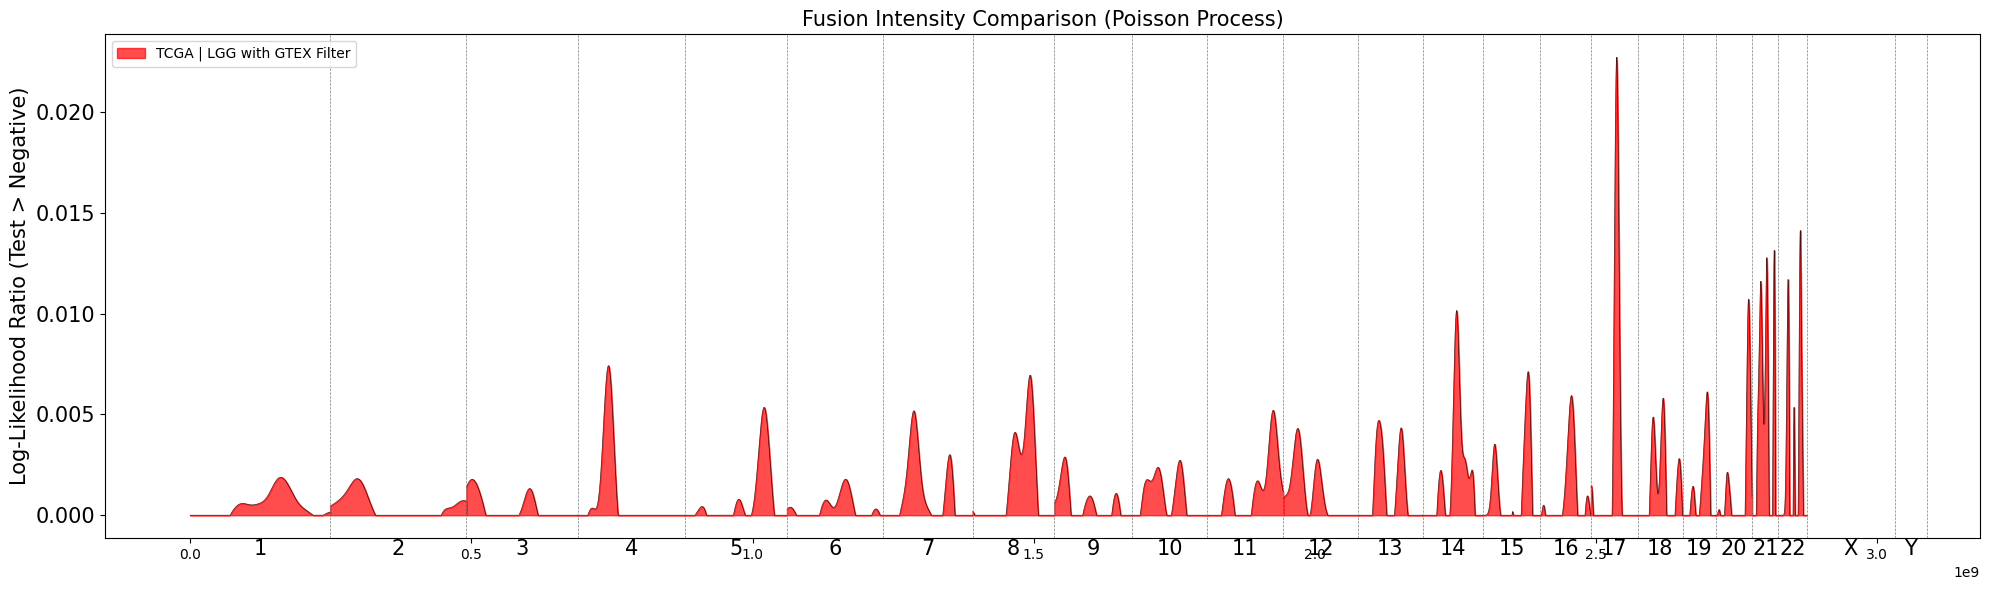

In [161]:
importlib.reload(plots)
plots.plot_fusion_densities_llr(tcga_fusions_star[tcga_fusions_star['tissue_type'] == 'LGG'][['fg_bk']].astype('str'),
                            gtex_fusions[['fg_bk']].astype('str'),
                            chromosome_sizes,
                            label = 'TCGA | LGG with GTEX Filter')

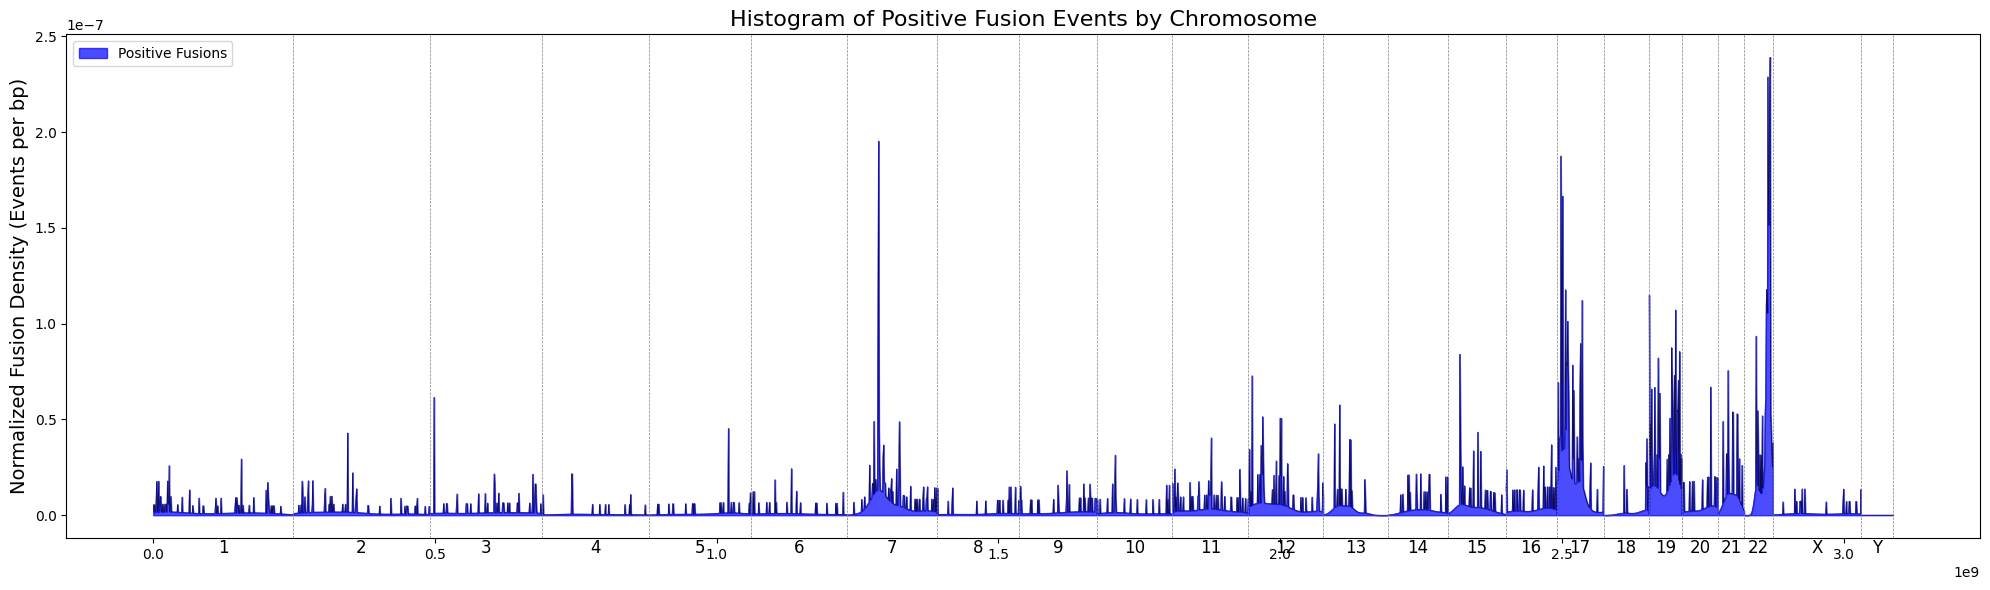

In [186]:
importlib.reload(plots)


pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'GBM') &
    (final_df['count_in_other_patients'] == 0) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_positive_fusion_histogram(pos_entries,
                            chromosome_sizes)

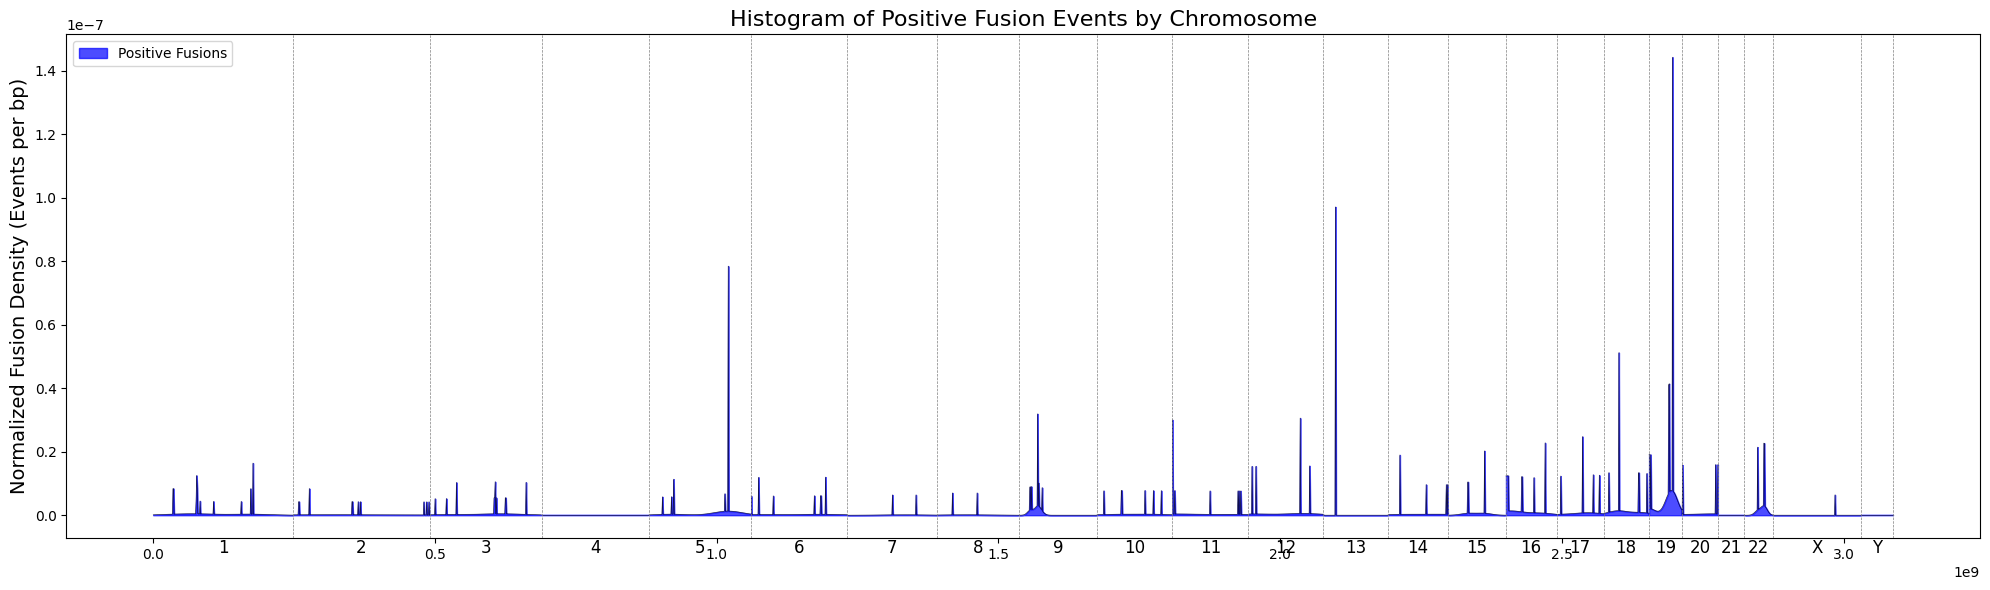

In [187]:
importlib.reload(plots)


pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'Oligo') &
    (final_df['count_in_other_patients'] == 0) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_positive_fusion_histogram(pos_entries,
                            chromosome_sizes)

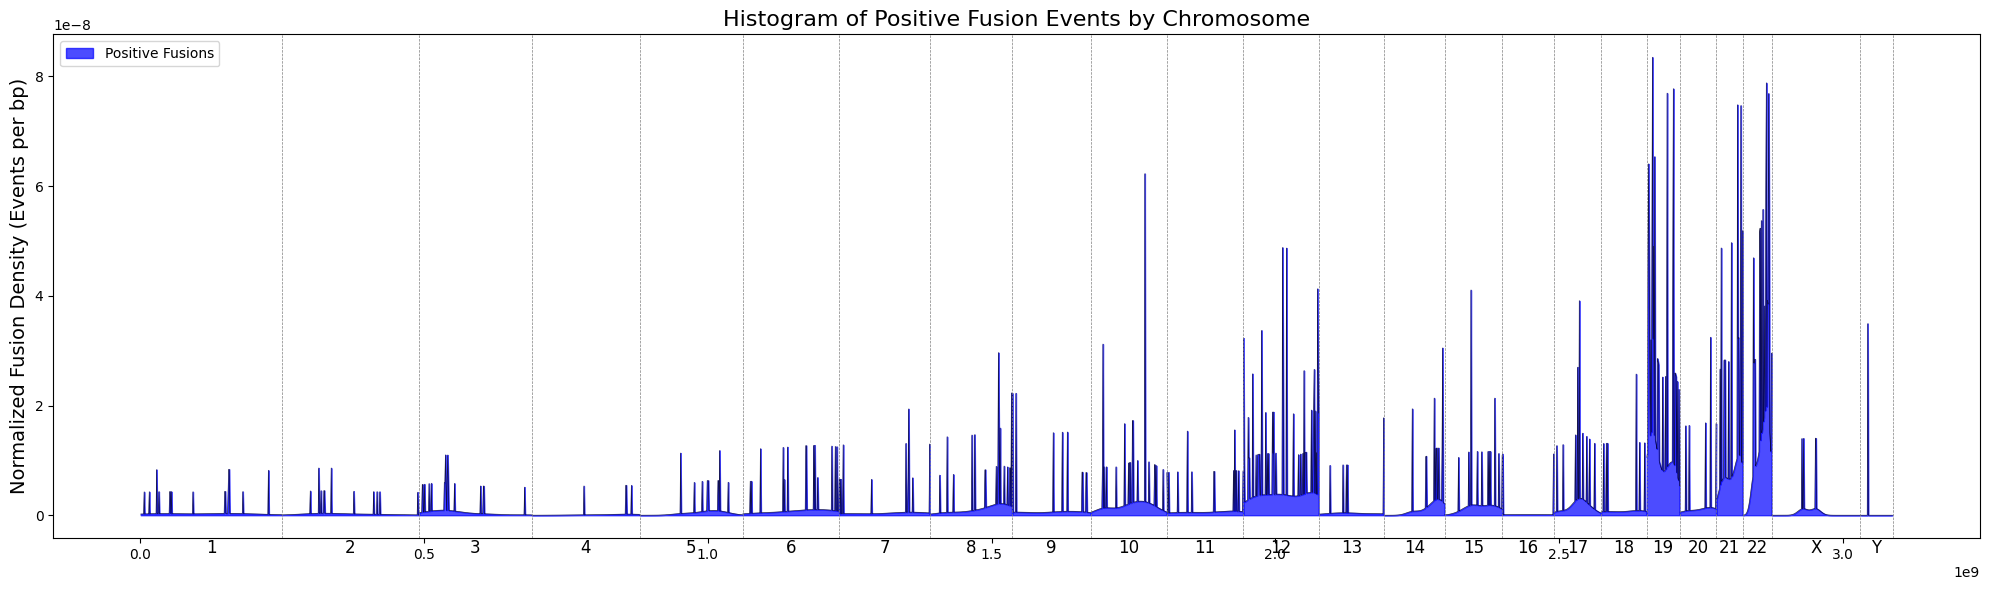

In [188]:
importlib.reload(plots)


pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'Astro') &
    (final_df['count_in_other_patients'] == 0) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_positive_fusion_histogram(pos_entries,
                            chromosome_sizes)

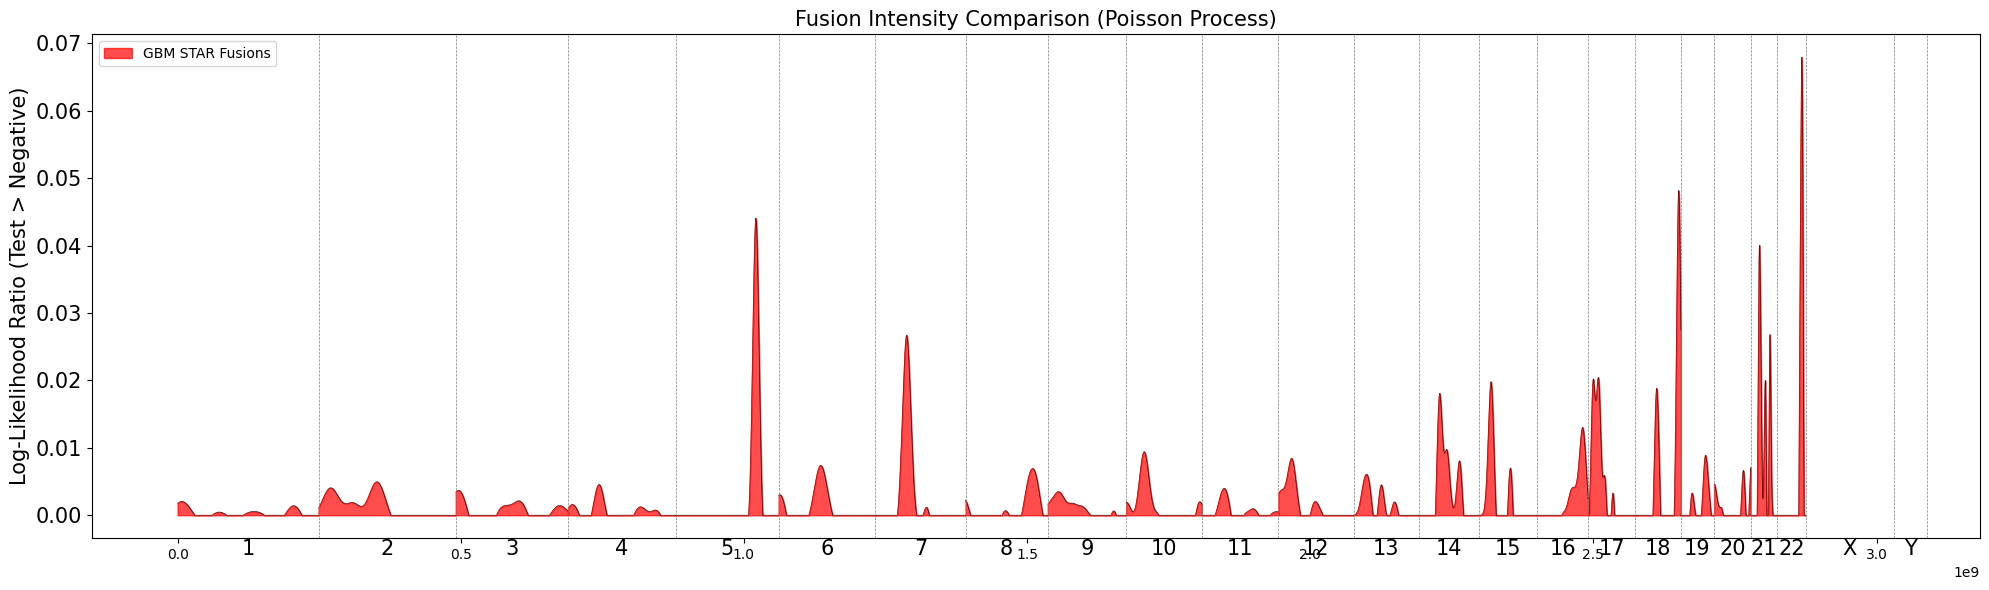

In [151]:
importlib.reload(plots)

pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'GBM') &
    # (final_df['total_observed_multiple_files_patient_total'] == 0) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities_llr(pos_entries,
                                gtex_fusions[['fg_bk']].astype('str'),
                                chromosome_sizes, label = 'GBM STAR Fusions')

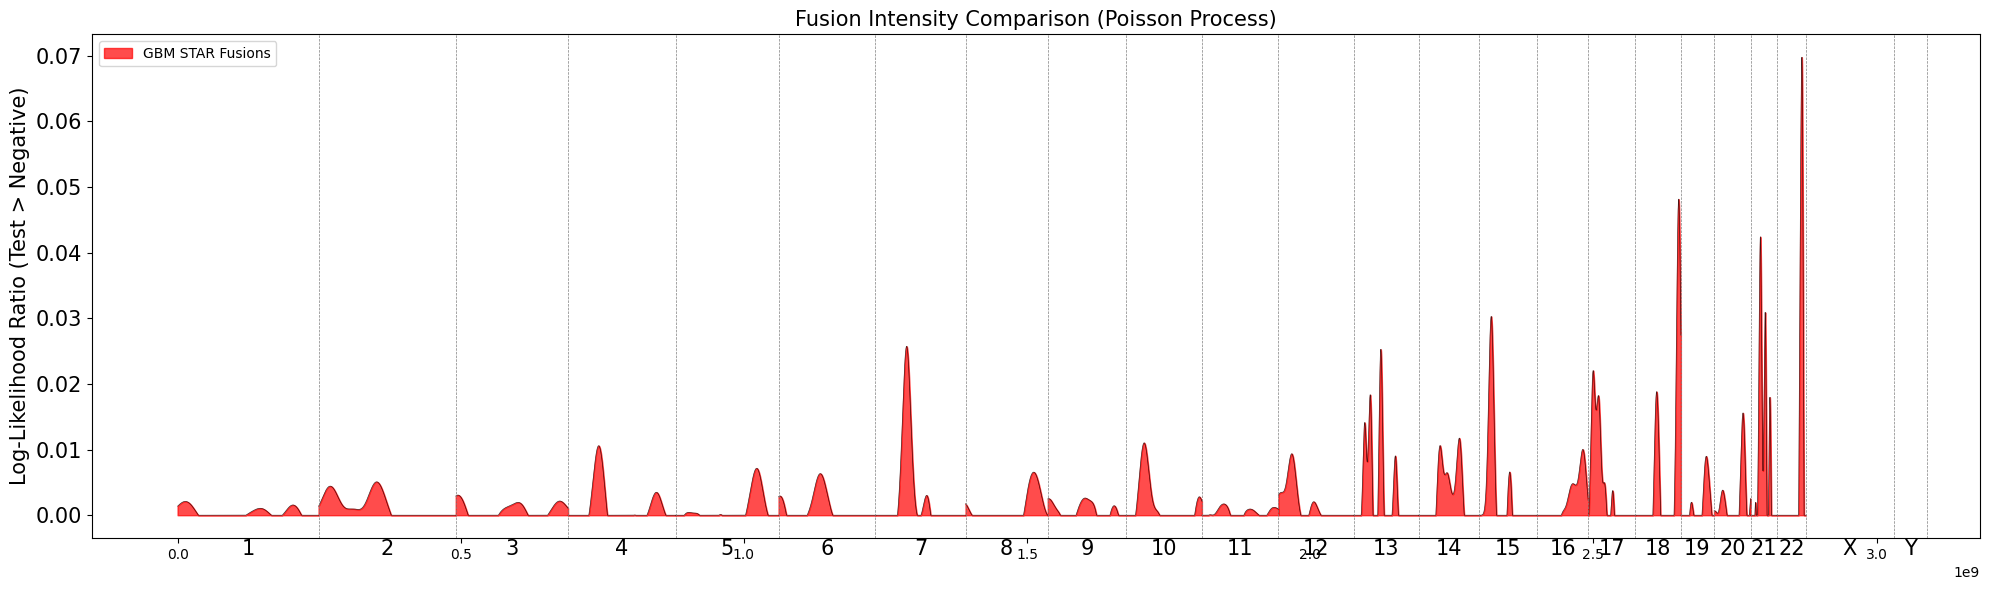

In [158]:
importlib.reload(plots)

pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'GBM') &
    (final_df['count_in_other_patients'] == 0) &
    # (final_df['total_observed_multiple_files'] > 1) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities_llr(pos_entries,
                                gtex_fusions[['fg_bk']].astype('str'),
                                chromosome_sizes, label = 'GBM STAR Fusions')

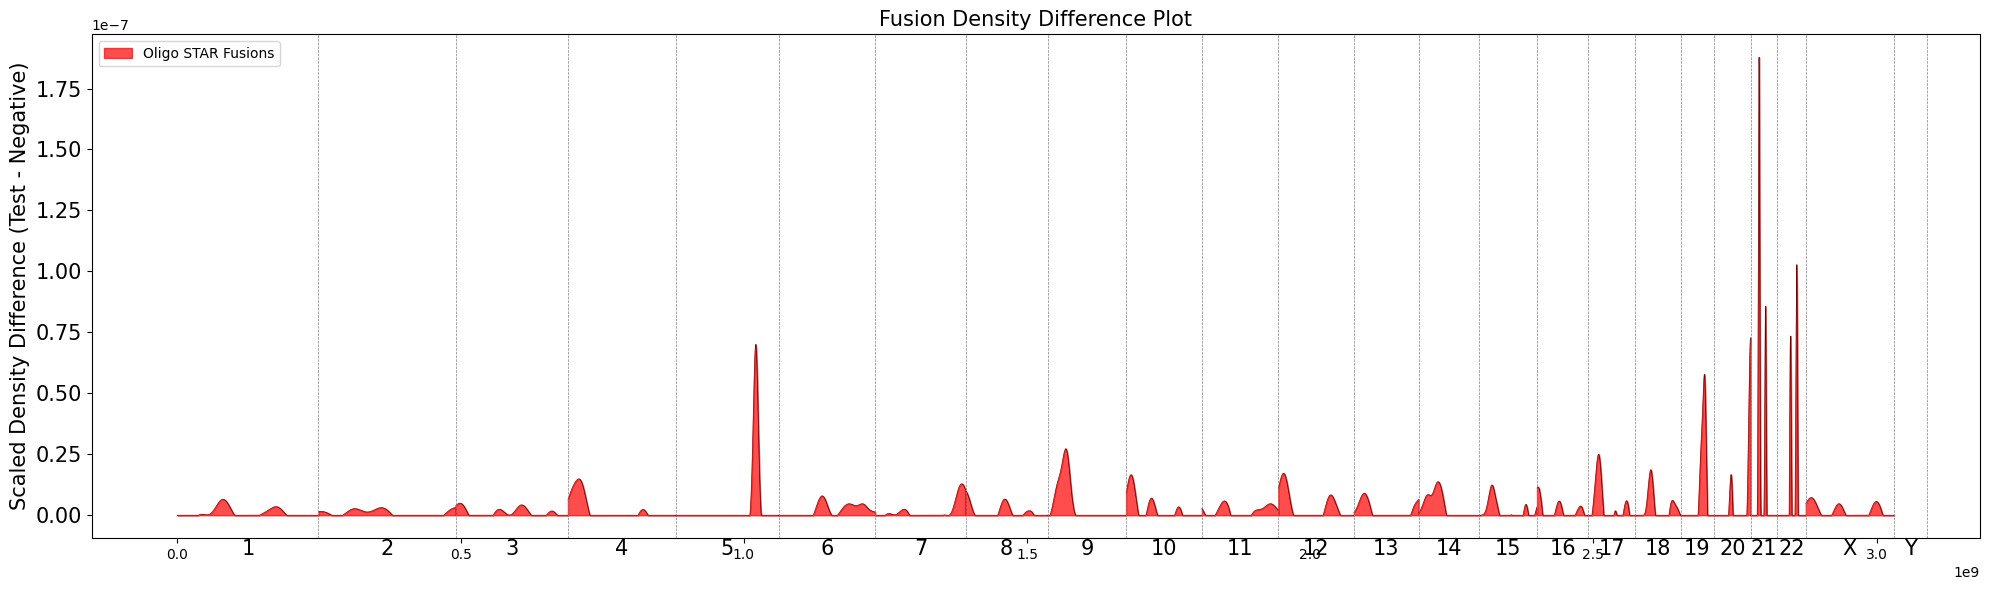

In [114]:
importlib.reload(plots)

pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'Oligo') &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities(pos_entries, gtex_fusions[['fg_bk']].astype('str'), chromosome_sizes, label = 'Oligo STAR Fusions')

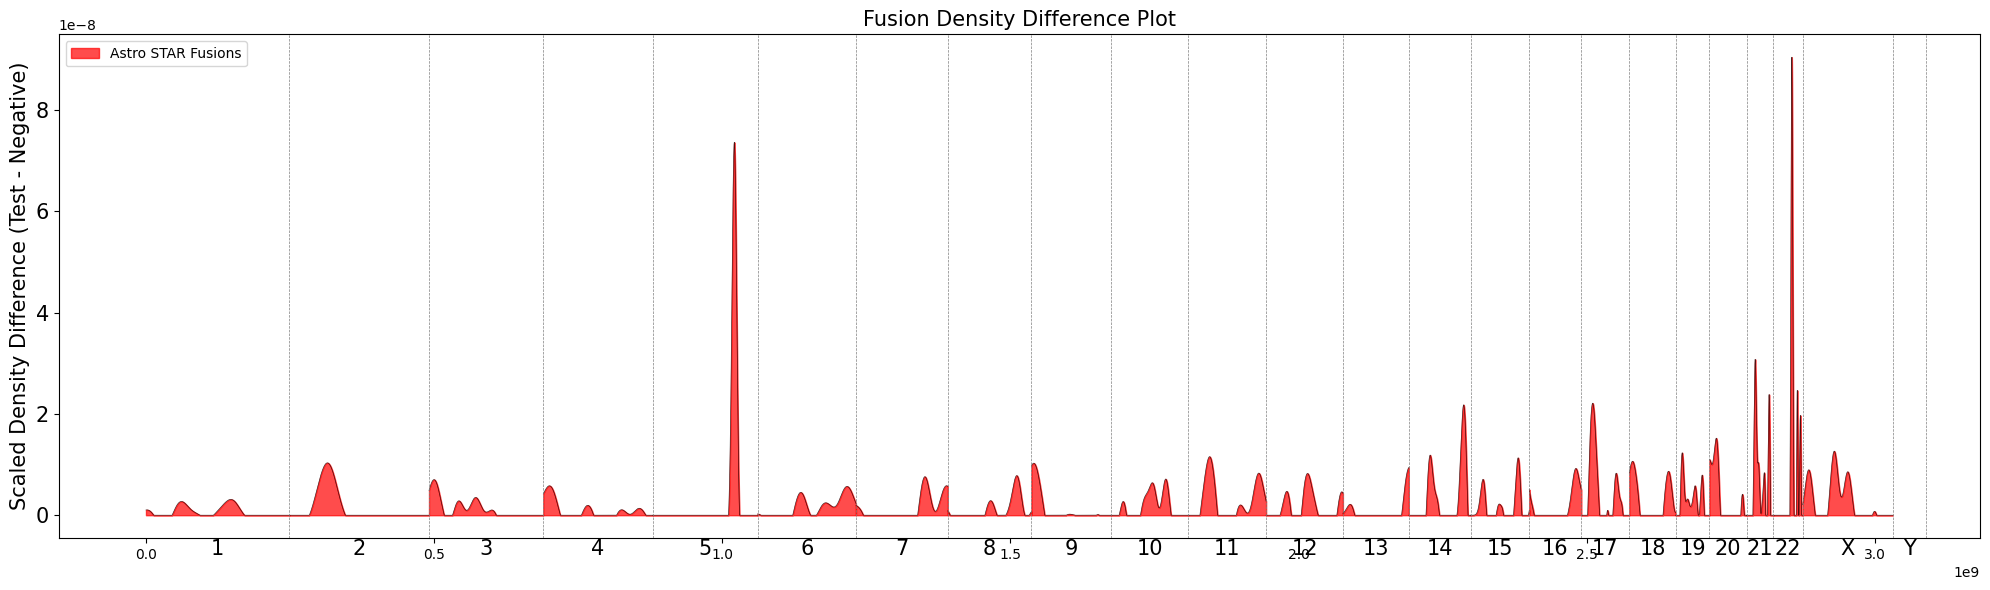

In [118]:
importlib.reload(plots)

pos_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['Histology'] == 'Astro') &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities(pos_entries, gtex_fusions[['fg_bk']].astype('str'), chromosome_sizes, label = 'Astro STAR Fusions')

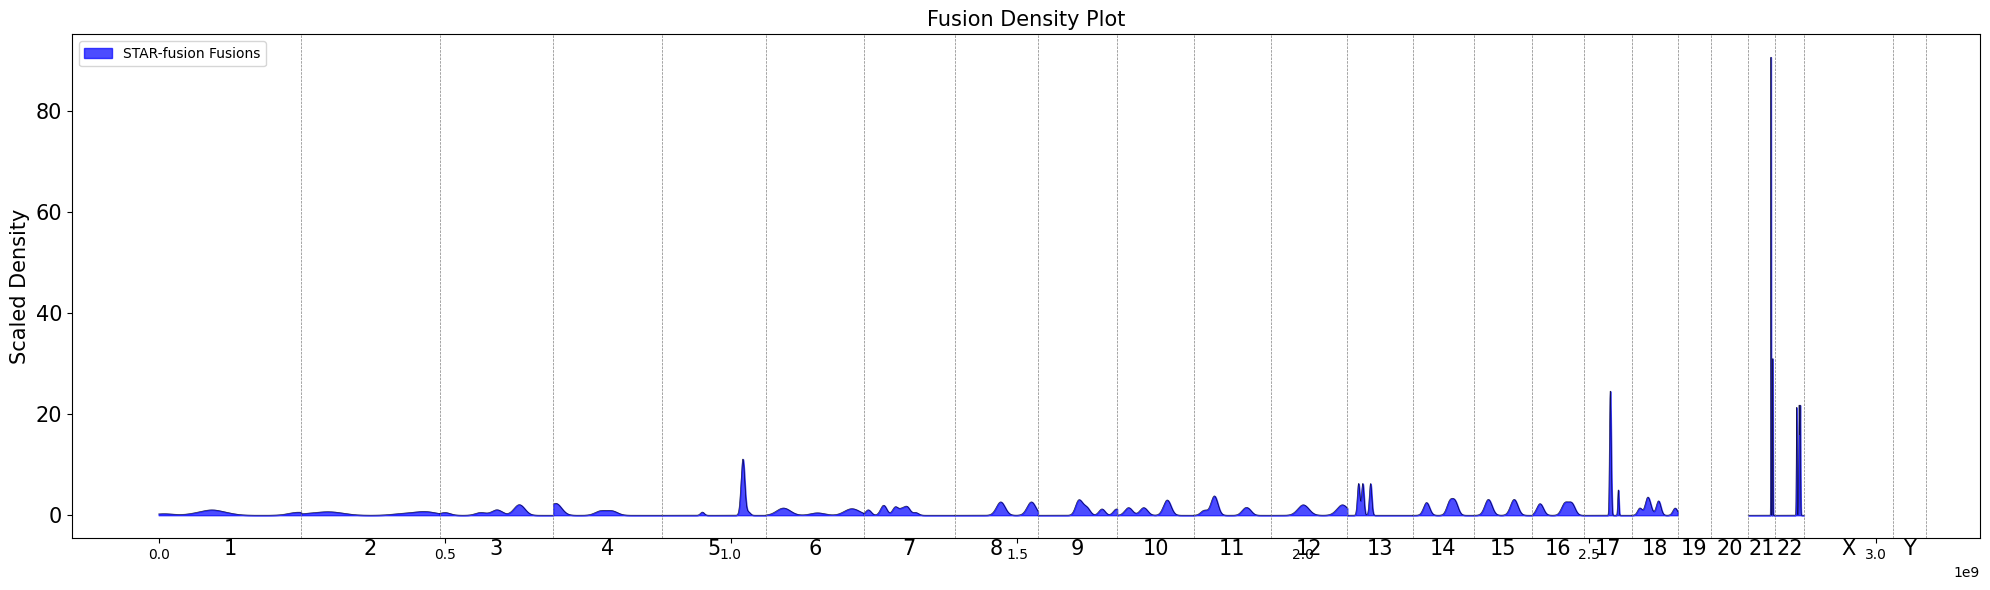

In [68]:
neg_entries = final_df[
    (final_df['GTEX'] == True) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities(neg_entries, chromosome_sizes, label = 'STAR-fusion Fusions')

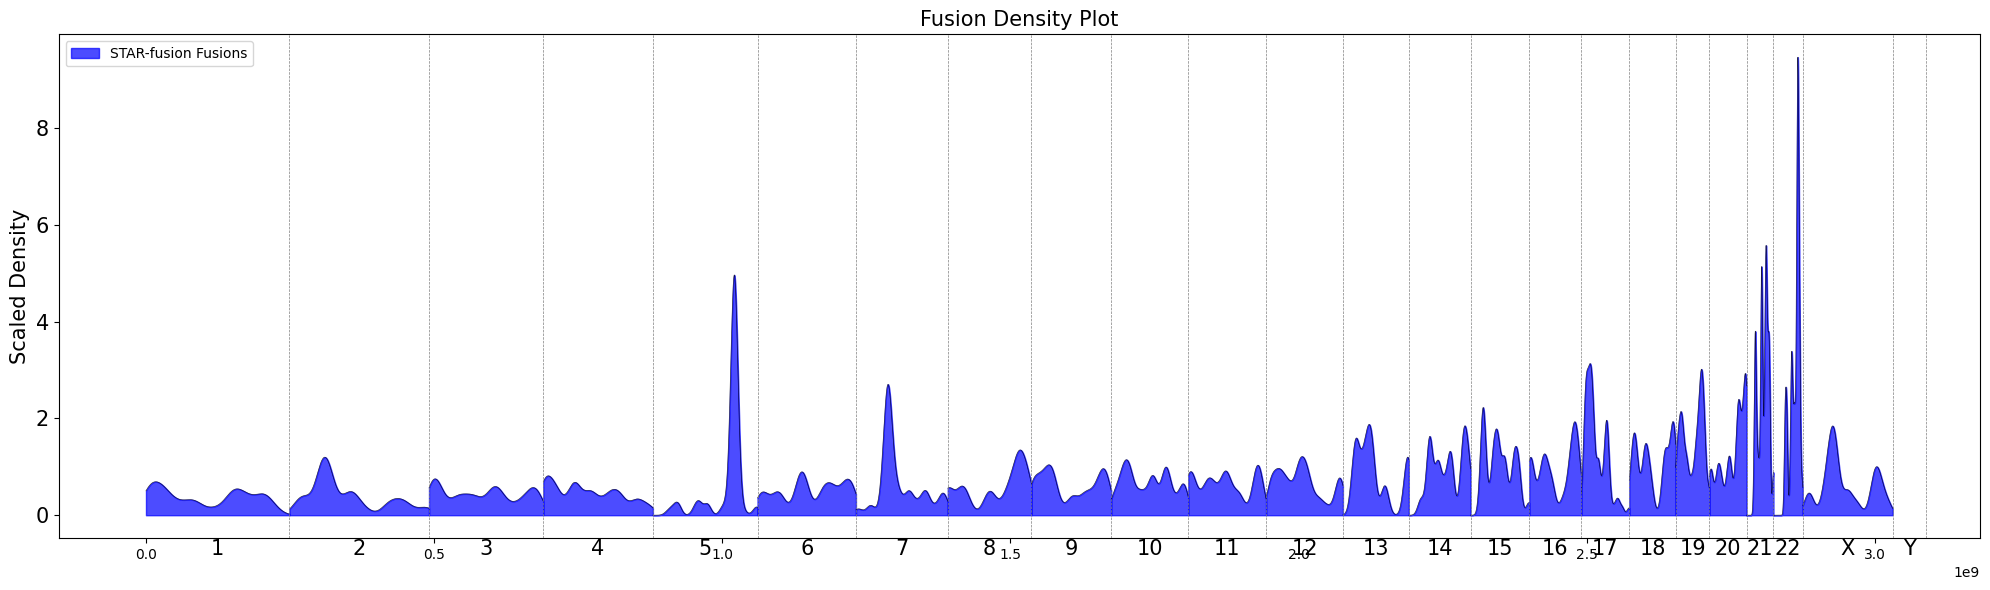

In [69]:
neg_entries = final_df[
    (final_df['GTEX'] == False) &
    (final_df['star_hg38'] > 0 ) 
]

plots.plot_fusion_densities(neg_entries, chromosome_sizes, label = 'STAR-fusion Fusions')